<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/filippaolofsson-lab4/Lab4/filippaolofsson_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Approximation**
**Filippa Olofsson**

# **Abstract**

This lab consists of an implementation of an algorithm that approximates a function f. The algorithm approximates the function f through L2 projection to point wise linear approximation over a 1D mesh. The accuracy of the algorithm was tested by plotting the function f against the approximated function. 

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [199]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

# **Introduction**

This lab uses L2 projection to point wise linear approximation over a 1D mesh to approximate a function f.



# **Method**

### 1. Function: L2 projection to pw linear approximation over mesh in 1D

We will iterate through all intervals of the mesh and for each of the intervals we will calculate the inner product of the local functions and add that to the global matrix and vector. 

when we have a Hilbert space V we can construct an approximation of $f \in V$ in a finite dimensional subspace $V_N \subset V$ in the form of the orthogonal projection onto $V_N$ which we call $P_Nf$. This is the best possible approximation of $f$ in $V_N$ (Theorem 1.8, Chapter 1). It is defined as:

\begin{equation}(P_Nf, v) = (f, v) \ \ \ \ \forall v \in V_N \ (9.14)\end{equation}

If $V_N$ is spanned by the basis {$\phi_i$}$_{i=1}^N$, which is defined by the mesh, we can rewrite the above expression to:
\begin{equation}\sum_{j=1}^N \alpha_j(\phi_j, \phi_i) = (f, \phi_i) \ \ \ \ \forall \ i=1,...,N \ (9.15)\end{equation}

This corresponds to a matrix equation $A\alpha = b$, where $A = (a_{ij})$ and $b = (b_i)$
\begin{equation} a_{ij} = (\phi_j, \phi_i) = \int_a^b \phi_j(x) \phi_i(x) dx \ (9.16)\end{equation}

\begin{equation} b_{i} = (f, \phi_i) = \int_a^b f(x) \phi_i(x) dx \ (9.17) \end{equation}

By finding the coordinates $\alpha$ we can get the $L^2$ projection 
\begin{equation} P_Nf(x) = \sum_{j=1}^N \alpha_j \phi_j(x) \end{equation}




---



The function integrate vector uses the scipy **integrate.quad** to calculate the integral. We have that $b_i$ can be written as:
\begin{equation} b_i = \int_{I_k}f(x)\lambda_{k, 1}(x) dx + \int_{I_{k+1}}f(x)\lambda_{k+1,0}(x) dx \end{equation}

We will only calculate the integral over one interval at a time and therefore checks if i=0 or i=1, depending on if the interval is $I_k = [x_{k-1}, x_k]$ or $I_{k+1} = [x_k, x_{k+1}]$

In [200]:
def integrate_vector(f, k, i, m):
  a, b = m[k], m[k+1]
  h = b - a
  if i == 0:
    p = lambda x: f(x)*(b - x)/h
  else:
    p = lambda x: f(x)*(x - a)/h 
  return integrate.quad(p, a, b)[0]

The Integrate matrix function is based on the fact that:

 $(a_{ij})$ = $\frac{h}{3}$ if i=j and 

 $(a_{ij}) = \frac{h}{6}$ if $\mid i - j \mid$ = 1, where h is the length of the interval. (Chapter 9, p. 201-202)

In [201]:
def integrate_matrix(k, i ,j, m):
  h = m[k+1] - m[k] #interval length
  if i==j: a_ij = h/3
  else: a_ij = h/6
  return a_ij

**Assemble system** is based on the algorithm 9.2 in Chapter 9. The function takes the function **f** and mesh **m** as inputs. The algorithm iterates thorugh all intervals of the mesh, the inner products are calculated and added to the global matrix A and vector b.

In [202]:
def assemble_system(f, m, A, b):
  n = len(m)
  for k in range(0, n-1):
    q = 2
    A_local, b_local = np.zeros((q, q)), np.zeros(q)
    for i in range(0, q):
      b_local[i] = integrate_vector(f, k, i, m)
      for j in range(0, q):
        A_local[i][j] = integrate_matrix(k, i, j, m)
      b[k:k+q] += b_local
      A[k:k+q, k:k+q] += A_local
  return A, b

The $L^2$ projection calls the assemble system function and then solve the linear equation. I am using numpy since it is the shortest implementation of the solution, but a function from an older lab could have been used. 

In [203]:
def L2_proj(f, m):
  A_glob = np.zeros((len(m), len(m)))
  b_glob = np.zeros(len(m))
  A, b = assemble_system(f, m, A_glob, b_glob)
  alpha = np.linalg.solve(A, b)
  return alpha

# **Results**

The easiest way to see if the approximation is good is to plot the original function **f** and the approximated one. Here we can clearly see that the performance of the approximation increases when we use a finer mesh.

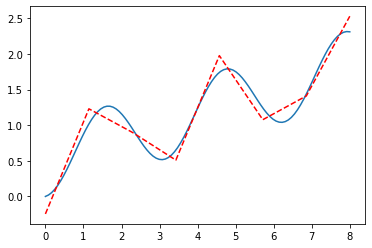

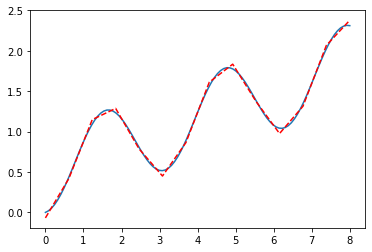

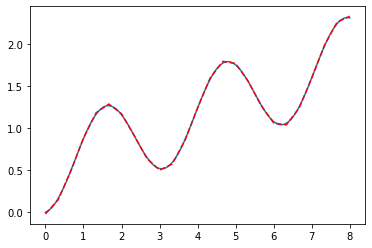

In [212]:
x = np.linspace(0, 8, 100)
f = lambda x: np.sin(x)**2 + x/6
for i in [8, 14, 25]:
  y = np.linspace(0, 8, i)
  alpha = L2_proj(f, y)
  plt.plot(x, f(x))
  plt.plot(y, alpha, '--', color="red")
  plt.show()

# **Discussion**

The results where suprisingly good since the algorithm seems to give a quite good approximation of the function even when the mesh is quite coarse. Overall, I think this lab was a bit tricky to implement. I had to discuss the lab with classmates and look at previous years student to get a better understanding on how it was supposed to be implemented.